In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.daf.persistence
import matplotlib.image as mpimg
import lsstutils
import hhana
from astropy.cosmology import FlatLambdaCDM
from toolbox import phot
cosmo = FlatLambdaCDM(70.0, 0.3)
butler = lsst.daf.persistence.Butler('/Volumes/HSC-rerun-20160523/')
sample = hhana.SuperCat('hsc-hugs')
plt.style.use('jpg')

In [4]:
targets = [(27, 'NGS'), (115, 'MIS'), (118, 'GII'), (125, 'MIS')]

ids = [hid[0] for hid in targets]
hsc_images = {}
for hid, _ in targets:
    ra, dec = sample[sample['hugs-id']==hid]['ra', 'dec'][0]
    hsc_images[hid] =  lsstutils.make_rgb_image(ra, dec, 35, butler=butler)

Config override file '?' appears to use 'root' instead of 'config'; trying with 'root'Config override file '?' appears to use 'root' instead of 'config'; trying with 'root'Config override file '?' appears to use 'root' instead of 'config'; trying with 'root'Config override file '?' appears to use 'root' instead of 'config'; trying with 'root'

In [5]:
def get_image(hugs_id, survey='hugs'):
    if survey=='hugs':
        fn = '../../data/rgb-cutouts/sample-3-6-2017/candy-'+str(hugs_id)+'.png'
    elif survey in ['NGS', 'MIS', 'GII']:
        fn = 'figures/hugs-'+str(hugs_id)+'_'+survey+'.png'
    return mpimg.imread(fn)

In [6]:
def draw_scale(ax, scale, img_shape):
    xmin = 20.0
    xmax = xmin + scale/0.168
    y=0.93*img_shape[0]
    ax.axhline(y=y, xmin=xmin/img_shape[1], xmax=xmax/img_shape[1], 
               color='w', lw=3.0, zorder=1000)
    label = str(int(scale))
    ax.text((xmin+xmax)/2 - 0.065*img_shape[1], y - 0.098*img_shape[0], 
            r'$'+label+'^{\prime\prime}$', color='w', fontsize=20)

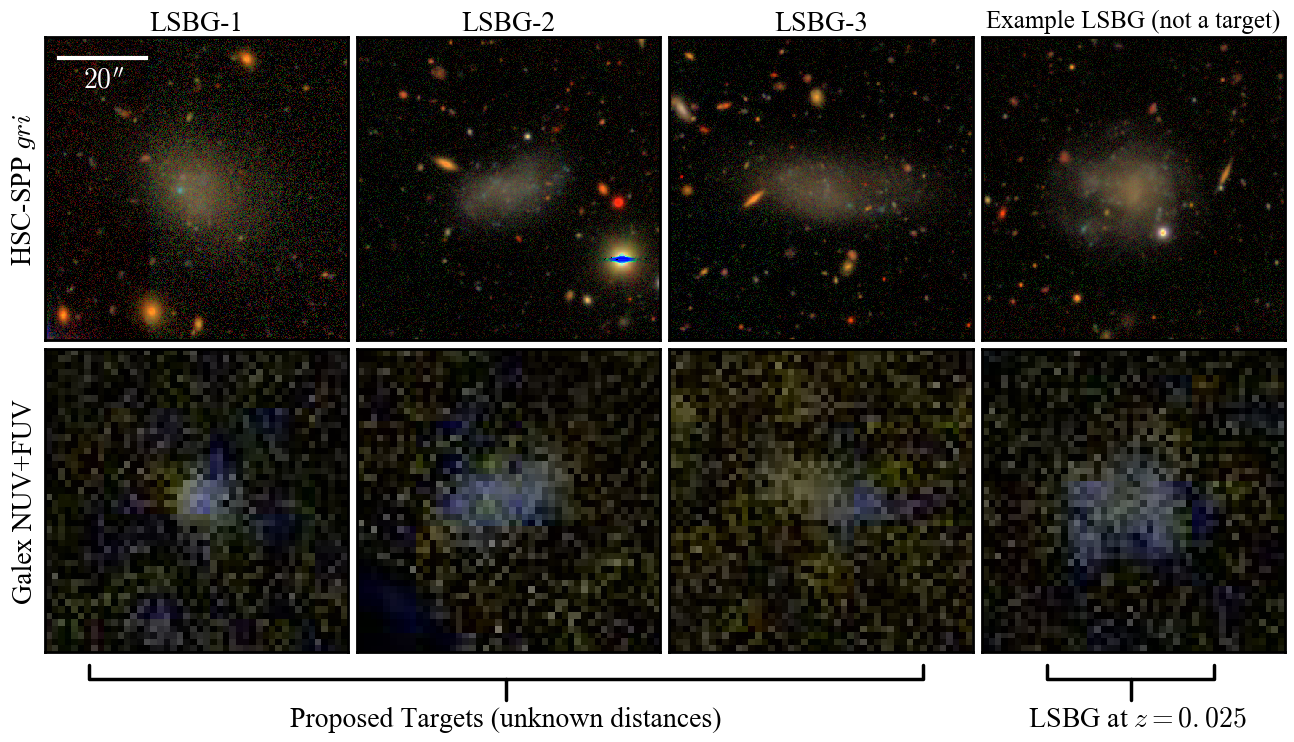

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(16,8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.01, wspace=0.03)
axes = axes.flatten()

for i, (hid, survey) in enumerate(targets):
    hsc_img = hsc_images[hid]
    galex_img = get_image(hid, survey)
    axes[i].imshow(hsc_img, origin='lower')
    if i!=3:
        axes[i].set_title('LSBG-'+str(i+1), fontsize=20)
    else:
        axes[i].set_title('Example LSBG (not a target)', y=1.01)
    if i==0:
        draw_scale(axes[i], 20, hsc_img.shape)
    axes[i+4].imshow(galex_img)

arrowprops = dict(
    arrowstyle='-[,widthB=15,lengthB=0.5',
    lw=2.5,
    color='k',
    connectionstyle='angle,angleA=0,angleB=90')

axes[4].annotate(
     'Proposed Targets (unknown distances)',
     annotation_clip=False,
     xy=(760, 540), 
     xycoords='data',
     ha='center', va='center',
     xytext=(760, 540+70), 
     textcoords='data', 
     arrowprops=arrowprops,
     fontsize=20
)

arrowprops['arrowstyle'] = '-[,widthB=3,lengthB=0.5'
axes[4].annotate(
     '  LSBG at $z=0.025$',
     annotation_clip=False,
     xy=(1790, 540), 
     xycoords='data',
     ha='center', va='center',
     xytext=(1790, 540+70), 
     textcoords='data', 
     arrowprops=arrowprops,
     fontsize=20
)
axes[0].set_ylabel('HSC-SPP $gri$', fontsize=20)    
axes[4].set_ylabel('Galex NUV+FUV', fontsize=20);
fig.savefig('figures/targets.pdf')  